# BL40A2020 Wireless Communication Systems

## Assignment  week 3: Digital modulation

## Author: Jesse Peltola

### Follow the steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%203/week3.ipynb) to analyze the *[8PSK](https://komm.readthedocs.io/en/latest/komm.PSKModulation/)* modulation

**1. Signal constelation**

In [1]:
import math
import komm
import sympy as sp
sp.init_printing()
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')




array([0, 1, 3, 2, 6, 7, 5, 4])

array([ 7.07106781e-01+7.07106781e-01j, -4.26642159e-17+1.00000000e+00j,
       -7.07106781e-01+7.07106781e-01j, -1.00000000e+00+1.21168839e-16j,
       -7.07106781e-01-7.07106781e-01j, -1.46862710e-16-1.00000000e+00j,
        7.07106781e-01-7.07106781e-01j,  1.00000000e+00-1.99673462e-16j])

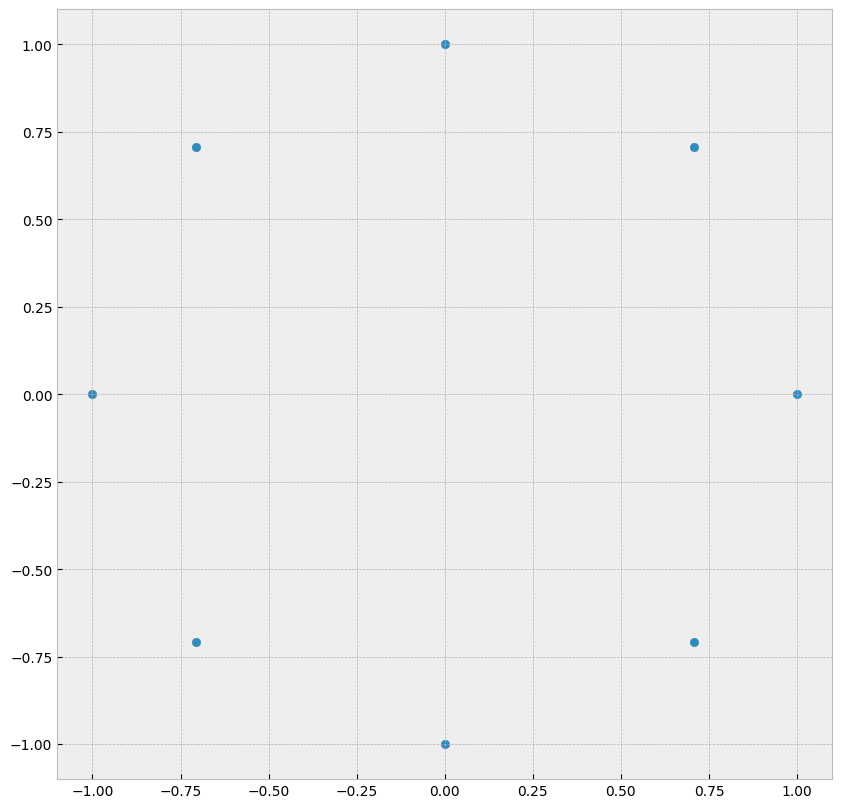

symbols


Input sequence length: 45


array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1])

Modulated with 8PSK length: 15


array([ 0.707+0.707j,  0.707-0.707j,  0.707-0.707j, -1.   +0.j   ,
       -0.   +1.j   , -0.707-0.707j,  0.707+0.707j,  0.707-0.707j,
       -0.707-0.707j,  0.707-0.707j, -0.707+0.707j, -1.   +0.j   ,
       -0.   +1.j   , -0.   +1.j   , -0.   -1.j   ])

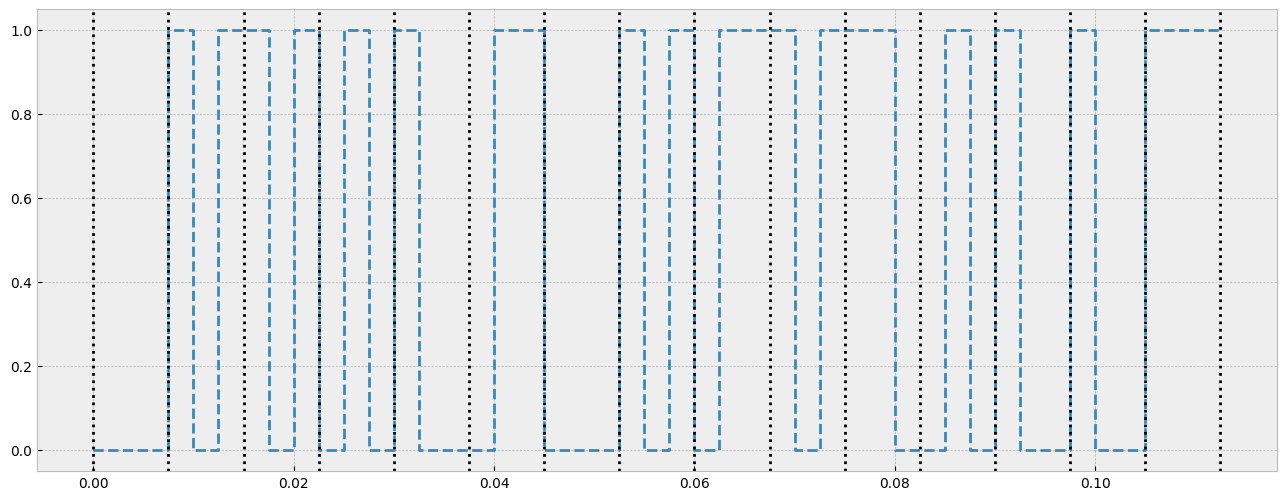

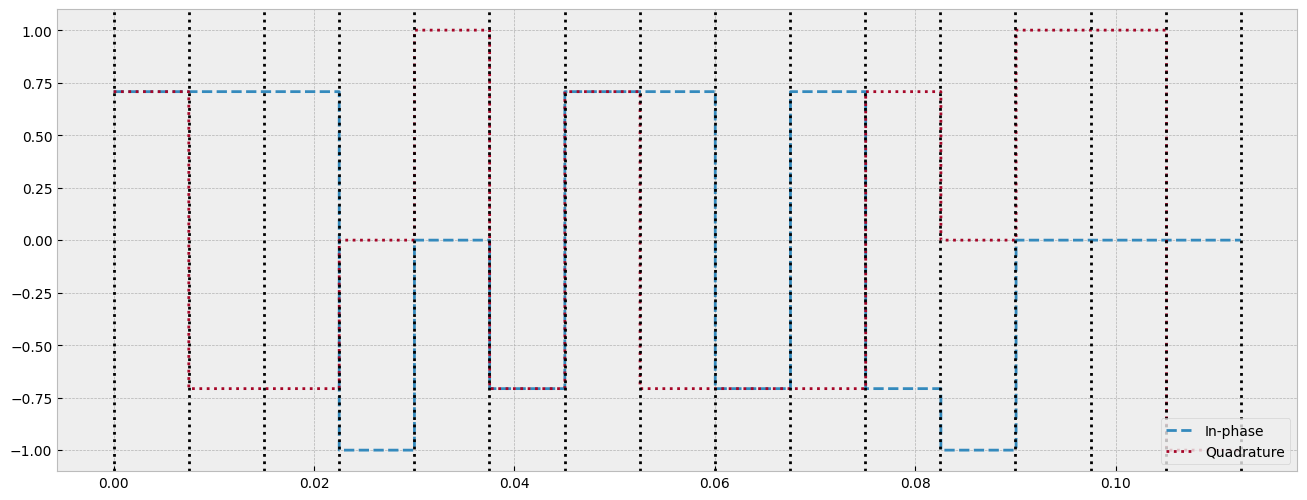

In [2]:
psk = komm.PSKModulation(8, phase_offset=np.pi/4.0)
display(psk.labeling)
display(psk.constellation)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(psk.constellation.real, psk.constellation.imag)
plt.show()

observations = int
observations = 15
rate = 400
input_seq_size = observations * np.log2(8).astype(int)
time_of_obs = input_seq_size/rate
tp = np.arange(0, input_seq_size, 1)/rate
input_seq = np.random.randint(2, size=input_seq_size)

print("symbols")
display(observations)
print("Input sequence", "length:", len(input_seq))
display(input_seq)
print("Modulated with 8PSK", "length:", len(np.around(psk.modulate(input_seq), decimals=3)))
display(np.around(psk.modulate(input_seq), decimals=3))

plt.rcParams['figure.figsize'] = 16, 6
input_seq_plot = np.append(input_seq, input_seq[input_seq_size-1])
tp_plot = np.append(tp, tp[input_seq_size-1]+1/rate)
plt.step(tp_plot, input_seq_plot, where='post', linestyle='--')
for i in range(observations + 1):
    plt.axvline(i * np.log2(8)/rate, linestyle=":", color="k");
    
plt.show()

n_samples = 30
tmod_points = n_samples * input_seq_size

tmod = np.linspace(0, tp_plot[input_seq_size], tmod_points)

input_wave_aux = psk.modulate(input_seq)
input_wave_I = np.zeros(tmod_points)
input_wave_Q = np.zeros(tmod_points)

for i in range(0, tmod_points):
    aux = math.floor(i/(n_samples * np.log2(8)))
    for j in range(8):
        if np.around(input_wave_aux[aux], decimals=3) == np.around(psk.constellation[j], decimals=3):
            input_wave_I[i] = psk.constellation[j].real
            input_wave_Q[i] = psk.constellation[j].imag

plt.step(tmod, input_wave_I, where='post', linestyle='--', label = 'In-phase')
plt.step(tmod, input_wave_Q, where='post', linestyle=':', label = 'Quadrature')
plt.legend(loc='lower right')
for i in range(observations+1):
    plt.axvline(i*np.log2(8)/rate, linestyle=':', color="k")
plt.show()



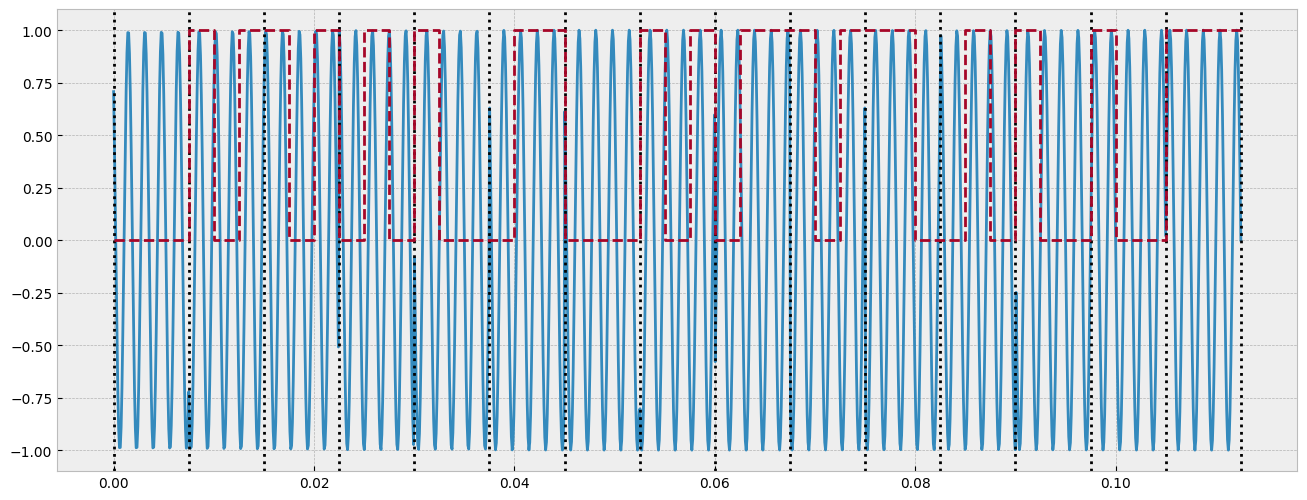

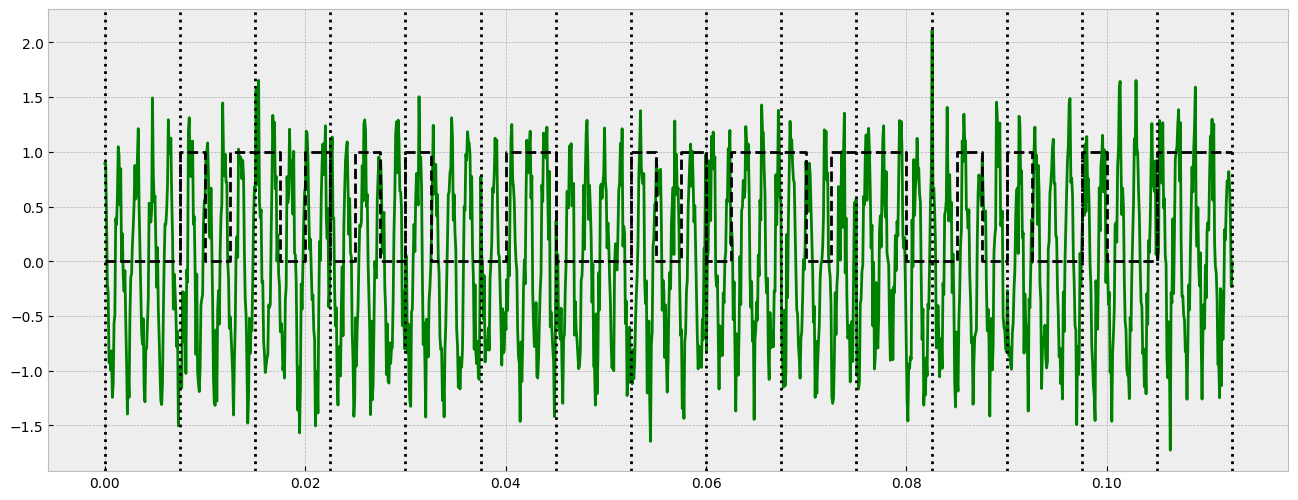

In [3]:
m, t, Am, fm, f, w = sp.symbols('a, t, A_m, f_m, f, omega')
A, fc = sp.symbols('A, f_c')

uc = sp.cos(2*sp.pi*fc*t)
us = sp.sin(2*sp.pi*fc*t)
freq_c = 600
modulation_I = sp.lambdify(t,uc.subs(fc,freq_c),"numpy")
modulation_Q = sp.lambdify(t,us.subs(fc,freq_c),"numpy")
plt.plot(tmod,input_wave_I*modulation_I(tmod) - input_wave_Q*modulation_Q(tmod))
for i in range(observations + 1):
    plt.axvline(i*np.log2(8)/rate,linestyle=':',color='k');
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--')
plt.show()

freq_c = 600
mu, sigma = 0, 0.2 # mean and standard deviation
noiseQ = np.random.normal(mu, sigma, tmod_points)
noiseI = np.random.normal(mu, sigma, tmod_points)
plt.plot(tmod,(input_wave_I*modulation_I(tmod) + noiseI) - (input_wave_Q*modulation_Q(tmod) + noiseQ),'g')
for i in range(observations + 1):
    plt.axvline(i*np.log2(8)/rate,linestyle=':',color='k');
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--',color='k')
plt.show()

**2. Numerical example:** Assume the following equation:

$$u_\mathrm{p}(t) = u_\mathrm{c}(t)\cos(2\pi 1000 t) - u_\mathrm{s}(t)\sin(2\pi 1000 t)$$

Plot the wave form for a random binary sequence of $12$ bits considering an information rate of 300 bits per second.

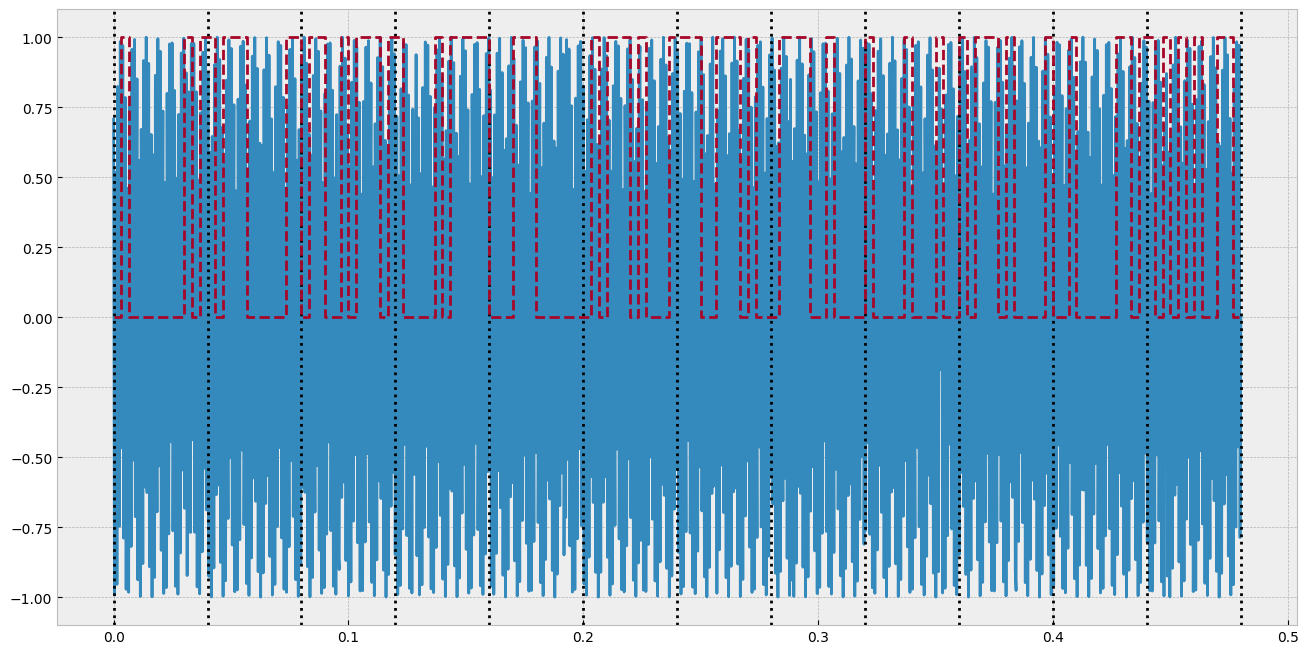

In [10]:
uc = sp.cos(2*sp.pi*fc*t)
us = sp.sin(2*sp.pi*fc*t)
freq_c = 1000
rate = 300

observations = int
observations = 12

input_seq_size = observations * np.log2(4096).astype(int)
time_of_obs = input_seq_size/rate
tp = np.arange(0, input_seq_size, 1)/rate

n_samples = 30


input_seq = np.random.randint(2, size=input_seq_size)
input_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])
tp_plot = np.append(tp,tp[input_seq_size-1]+1/rate)
tmod = np.linspace(0, tp_plot[input_seq_size], tmod_points)


modulation_I = sp.lambdify(t, uc.subs(fc, freq_c), "numpy")
modulation_Q = sp.lambdify(t, us.subs(fc, freq_c), "numpy")
plt.plot(tmod,input_wave_I*modulation_I(tmod) - input_wave_Q*modulation_Q(tmod))
for i in range(observations + 1):
    plt.axvline(i*np.log2(4096)/rate,linestyle=':',color='k');
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--')
plt.show()


**3. Compute analytically the 99% and 90% power-containment bandwidths and test it with numerical results**


Analytical 99% Power-Containment Bandwidth: 2079.9999999999995 Hz
Analytical 90% Power-Containment Bandwidth: 1297.7777777777778 Hz


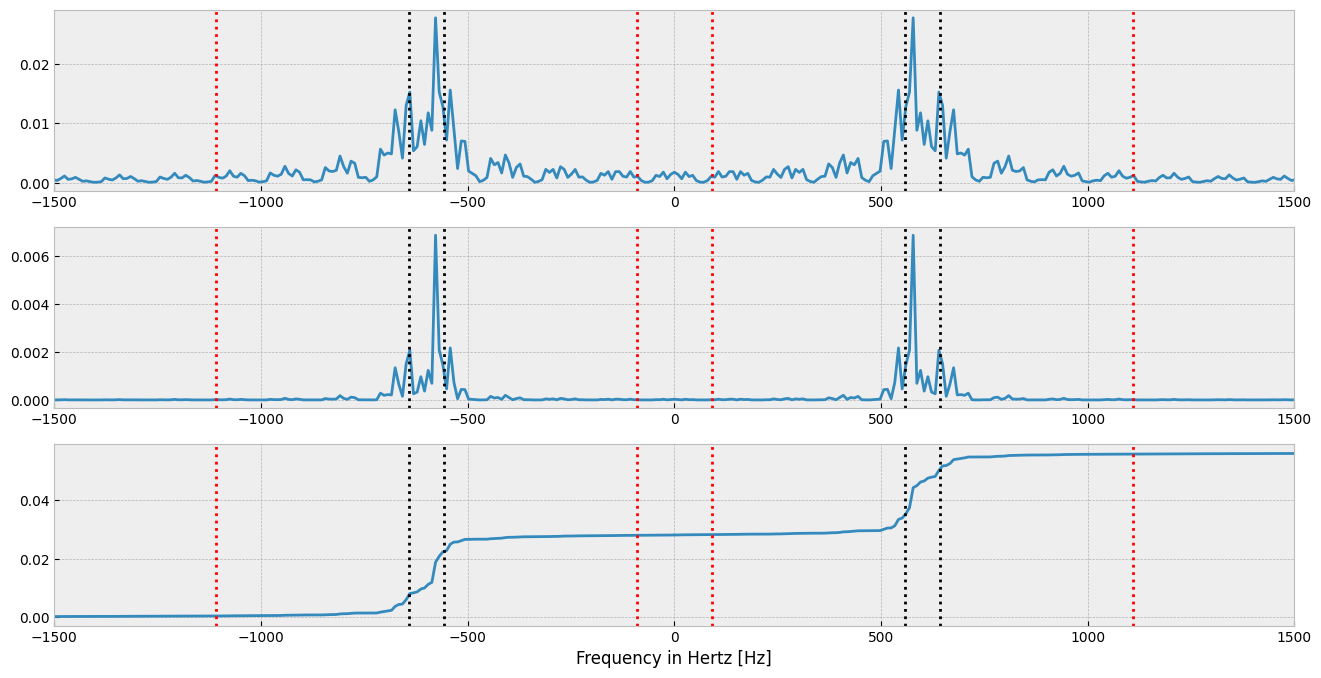

In [5]:
# FFT computation
X = fftpack.fft(input_wave_I * modulation_I(tmod) - input_wave_Q * modulation_Q(tmod)) / (tmod_points / tp_plot[input_seq_size])
freq = fftpack.fftfreq(len(input_wave_I * modulation_I(tmod) - input_wave_Q * modulation_Q(tmod))) * tmod_points / tp_plot[input_seq_size]
X = fftpack.fftshift(X)
freq = fftpack.fftshift(freq)
absX = np.abs(X)

# Plotting from referring example 
plt.rcParams['figure.figsize'] = 16, 8
ax = plt.subplot(311)
ax.plot(freq, absX)
ax.axvline(freq_c - 85/2, linestyle=':', color='k')
ax.axvline(freq_c + 85/2, linestyle=':', color='k')
ax.axvline(freq_c - 510, linestyle=':', color='r')
ax.axvline(freq_c + 510, linestyle=':', color='r')
ax.axvline(-freq_c - 85/2, linestyle=':', color='k')
ax.axvline(-freq_c + 85/2, linestyle=':', color='k')
ax.axvline(-freq_c - 510, linestyle=':', color='r')
ax.axvline(-freq_c + 510, linestyle=':', color='r')
ax.set_xlim(-1500, 1500)

ax1 = plt.subplot(312)
ax1.plot(freq, absX**2 / tp_plot[input_seq_size])
ax1.axvline(freq_c - 85/2, linestyle=':', color='k')
ax1.axvline(freq_c + 85/2, linestyle=':', color='k')
ax1.axvline(freq_c - 510, linestyle=':', color='r')
ax1.axvline(freq_c + 510, linestyle=':', color='r')
ax1.axvline(-freq_c - 85/2, linestyle=':', color='k')
ax1.axvline(-freq_c + 85/2, linestyle=':', color='k')
ax1.axvline(-freq_c - 510, linestyle=':', color='r')
ax1.axvline(-freq_c + 510, linestyle=':', color='r')
ax1.set_xlim(-1500, 1500)

ax2 = plt.subplot(313)
ax2.plot(freq, np.cumsum(absX**2 / tp_plot[input_seq_size]))
ax2.axvline(freq_c - 85/2, linestyle=':', color='k')
ax2.axvline(freq_c + 85/2, linestyle=':', color='k')
ax2.axvline(freq_c - 510, linestyle=':', color='r')
ax2.axvline(freq_c + 510, linestyle=':', color='r')
ax2.axvline(-freq_c - 85/2, linestyle=':', color='k')
ax2.axvline(-freq_c + 85/2, linestyle=':', color='k')
ax2.axvline(-freq_c - 510, linestyle=':', color='r')
ax2.axvline(-freq_c + 510, linestyle=':', color='r')
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_xlim(-1500, 1500)

# Analytical computation of 99% and 90% power-containment bandwidths
total_power = np.sum(absX**2) / tp_plot[input_seq_size]
cumulative_power = np.cumsum(absX**2 / tp_plot[input_seq_size])

# Find the frequency index corresponding to 99% power containment
index_99_percent = np.argmax(cumulative_power >= 0.99 * total_power)
bw_99_percent = 2 * np.abs(freq[index_99_percent])

# Find the frequency index corresponding to 90% power containment
index_90_percent = np.argmax(cumulative_power >= 0.90 * total_power)
bw_90_percent = 2 * np.abs(freq[index_90_percent])

print(f"Analytical 99% Power-Containment Bandwidth: {bw_99_percent} Hz")
print(f"Analytical 90% Power-Containment Bandwidth: {bw_90_percent} Hz")

plt.show()